In [1]:
# ======================================
# 1. Import Necessary Libraries
# ======================================

# Import essential libraries for data manipulation, modeling, and evaluation
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from pathlib import Path
import matplotlib.pyplot as plt

# Enable inline plots for Jupyter Notebook
%matplotlib inline


In [2]:
# ======================================
# 2. Set Project Path and Load Data
# ======================================

# Define the project root directory (adjust based on your folder structure)
project_root = Path.cwd().parent  # Assuming the notebook is in a "Scripts" subfolder
print("Project Root:", project_root)

# Load preprocessed datasets
train_data = pd.read_csv(project_root / "data" / "preprocessed_train.csv")
test_data = pd.read_csv(project_root / "data" / "preprocessed_test.csv")

# Preview the training data
print("Train Data Head:\n", train_data.head())
print("\nTest Data Head:\n", test_data.head())


Project Root: c:\Users\thomas.hunter\Documents\Python\kaggle_titanic
Train Data Head:
    Survived  Pclass       Age  SibSp  Parch      Fare  Age_Missing  \
0         0       2 -0.565736      1      0 -0.502445            0   
1         1       0  0.663861      1      0  0.786845            0   
2         1       2 -0.258337      0      0 -0.488854            0   
3         1       0  0.433312      1      0  0.420730            0   
4         0       2  0.433312      0      0 -0.486337            0   

   Cabin_Deck  Cabin_Missing  Embarked_Q  Embarked_S  Sex_male  Family_Size  
0          -1              1           0           1         1            2  
1           2              0           0           0         0            2  
2          -1              1           0           1         0            1  
3           2              0           0           1         0            2  
4          -1              1           0           1         1            1  

Test Data Head:
    Pcl

In [3]:
# ======================================
# 3. Define Features and Target
# ======================================

# Separate features (X) and target (y) from the training dataset
X = train_data.drop('Survived', axis=1)  # Features (drop the target column)
y = train_data['Survived']  # Target variable (Survived: 0 = No, 1 = Yes)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits to ensure data is correctly partitioned
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")


X_train shape: (712, 12), X_val shape: (179, 12)
y_train shape: (712,), y_val shape: (179,)


In [4]:
# ======================================
# 4. Train the Random Forest Classifier
# ======================================

# Initialize the Random Forest Classifier with default parameters
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict survival on the validation set
y_pred = rf_model.predict(X_val)


Random Forest Accuracy: 0.7877

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



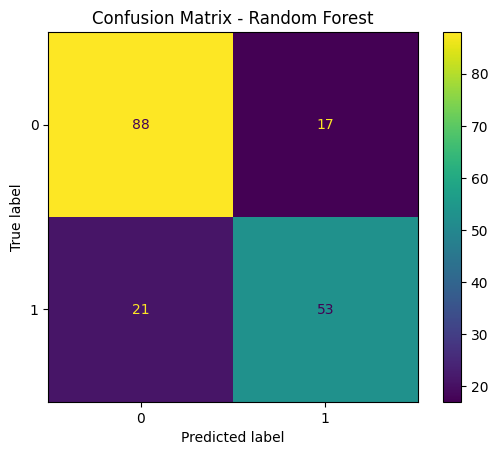

In [5]:
# ======================================
# 5. Evaluate Model Performance
# ======================================

# Calculate and display accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Generate a confusion matrix to evaluate true/false positives/negatives
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


Feature Importance:
           Feature  Importance
10       Sex_male    0.253162
1             Age    0.236969
4            Fare    0.225977
0          Pclass    0.061654
11    Family_Size    0.053533
6      Cabin_Deck    0.051163
2           SibSp    0.029757
7   Cabin_Missing    0.028501
3           Parch    0.025616
9      Embarked_S    0.024432
8      Embarked_Q    0.009236
5     Age_Missing    0.000000


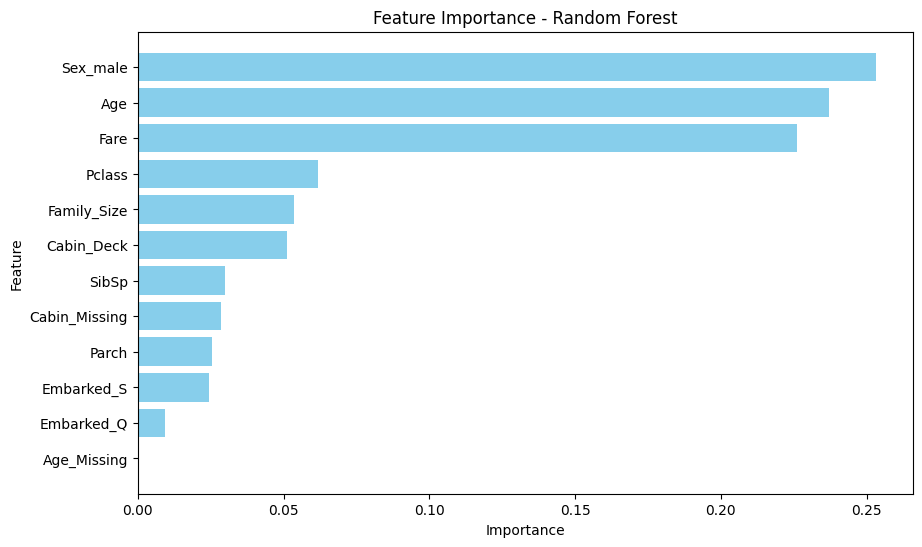

In [6]:
# ======================================
# 6. Analyze Feature Importance
# ======================================

# Extract and display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Plot feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()


In [7]:
# ======================================
# 7. Hyperparameter Tuning (Optional)
# ======================================

# Define a grid of hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees in the forest
    'max_depth': [5, 10, 15, None],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples to be a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.8300


Tuned Random Forest Accuracy: 0.8101

Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



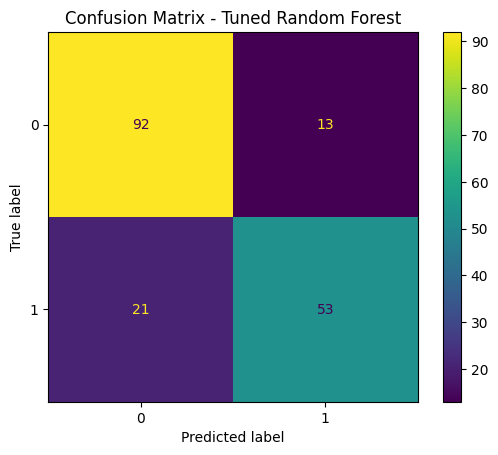

In [8]:
# ======================================
# 8. Evaluate the Final Model (After Tuning)
# ======================================

# Use the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the validation set using the tuned model
y_pred_tuned = best_rf_model.predict(X_val)

# Calculate and display accuracy
accuracy_tuned = accuracy_score(y_val, y_pred_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_tuned:.4f}")

# Display a detailed classification report
print("\nTuned Classification Report:")
print(classification_report(y_val, y_pred_tuned))

# Generate and display a confusion matrix
cm_tuned = confusion_matrix(y_val, y_pred_tuned)
ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=best_rf_model.classes_).plot()
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [ ]:

Summary
The tuned Random Forest matches Logistic Regression in accuracy and offers robust performance with interpretable feature importance.
However, Logistic Regression still has slightly better recall for survivors, making it a viable alternative depending on the project focus.


In [9]:
# Predict survival outcomes for the test dataset
test_predictions = best_rf_model.predict(test_data)


In [10]:

# Reload the original test data
original_test_data = pd.read_csv(project_root / "data" / "test.csv")

# Verify the columns in the original test data
print(original_test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
# Add PassengerId to the preprocessed test data
test_data['PassengerId'] = original_test_data['PassengerId']

# Verify that PassengerId is now included
print(test_data.columns)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_Missing', 'Cabin_Deck',
       'Cabin_Missing', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Family_Size',
       'PassengerId'],
      dtype='object')


In [12]:
# Create the submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # Now restored
    'Survived': test_predictions
})

# Save the submission file
submission_file = project_root / "submission.csv"
submission.to_csv(submission_file, index=False)

print(f"Submission file saved at: {submission_file}")

Submission file saved at: c:\Users\thomas.hunter\Documents\Python\kaggle_titanic\submission.csv


In [ ]:
print(submission.shape)  # Should be (418, 2)
# Display all rows of the DataFrame
print(submission.to_string())

(418, 2)
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         0
34           926         1
35           927   